In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#pandas
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

In [2]:
houseDF=pd.read_csv('Data file.csv')

In [3]:
print('Represention of Top Five Row')
houseDF.head()

Represention of Top Five Row


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print('Dataset Shape',houseDF.shape)


Dataset Shape (1460, 81)


In [5]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print('Checking of column which contains more than 50 percent null values:\n',houseDF.isnull().sum()[houseDF.isnull().sum()>len(houseDF)//2])

Checking of column which contains more than 50 percent null values:
 Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


In [7]:
drop_list=houseDF.isnull().sum()[houseDF.isnull().sum()>len(houseDF)//2].index

In [8]:
houseDF.drop(columns=drop_list,inplace=True)

In [9]:
houseDF.shape

(1460, 77)

In [10]:
houseDF.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [11]:
houseDF_null_index=houseDF.isnull().sum()[houseDF.isnull().sum()>0].index


In [12]:
def null_Handler(ind,df):
    int_list=[]
    obj_list=[]
    extra=[]
    x=df
    for i in ind:
        if x[i].dtype=='float64' or x[i].dtype=='int64':
            x[i]=x[i].fillna(x[i].mean())
            int_list.append(i)
        elif x[i].dtype=='object':
            x[i]=x[i].fillna(x[i].mode()[0])
            obj_list.append(i)
        else:
            extra.append(i)
    print(int_list,len(int_list))
    print(obj_list,len(obj_list))
    print(extra,len(extra))
    return x

In [13]:
df_houseDF=null_Handler(houseDF_null_index,houseDF)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 3
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] 12
[] 0


In [14]:
df_houseDF.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [15]:
houseDF.shape

(1460, 77)

In [16]:
houseDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
#check datatypes in orders
houseDF.columns.to_series().groupby(houseDF.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond

In [18]:
#viewing number of distinct observations
houseDF.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [19]:
#check descriptive statistics.
houseDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.500000,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.000000,70.00,190.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.00,70.049958,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.500000,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.000000,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.000000,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.000000,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.000000,2004.00,2010.0
MasVnrArea,1460.0,103.685262,180.569112,0.0,0.00,0.000000,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.500000,712.25,5644.0


In [20]:
#drop unused attribute
houseDF.drop('Id',axis=1,inplace=True)

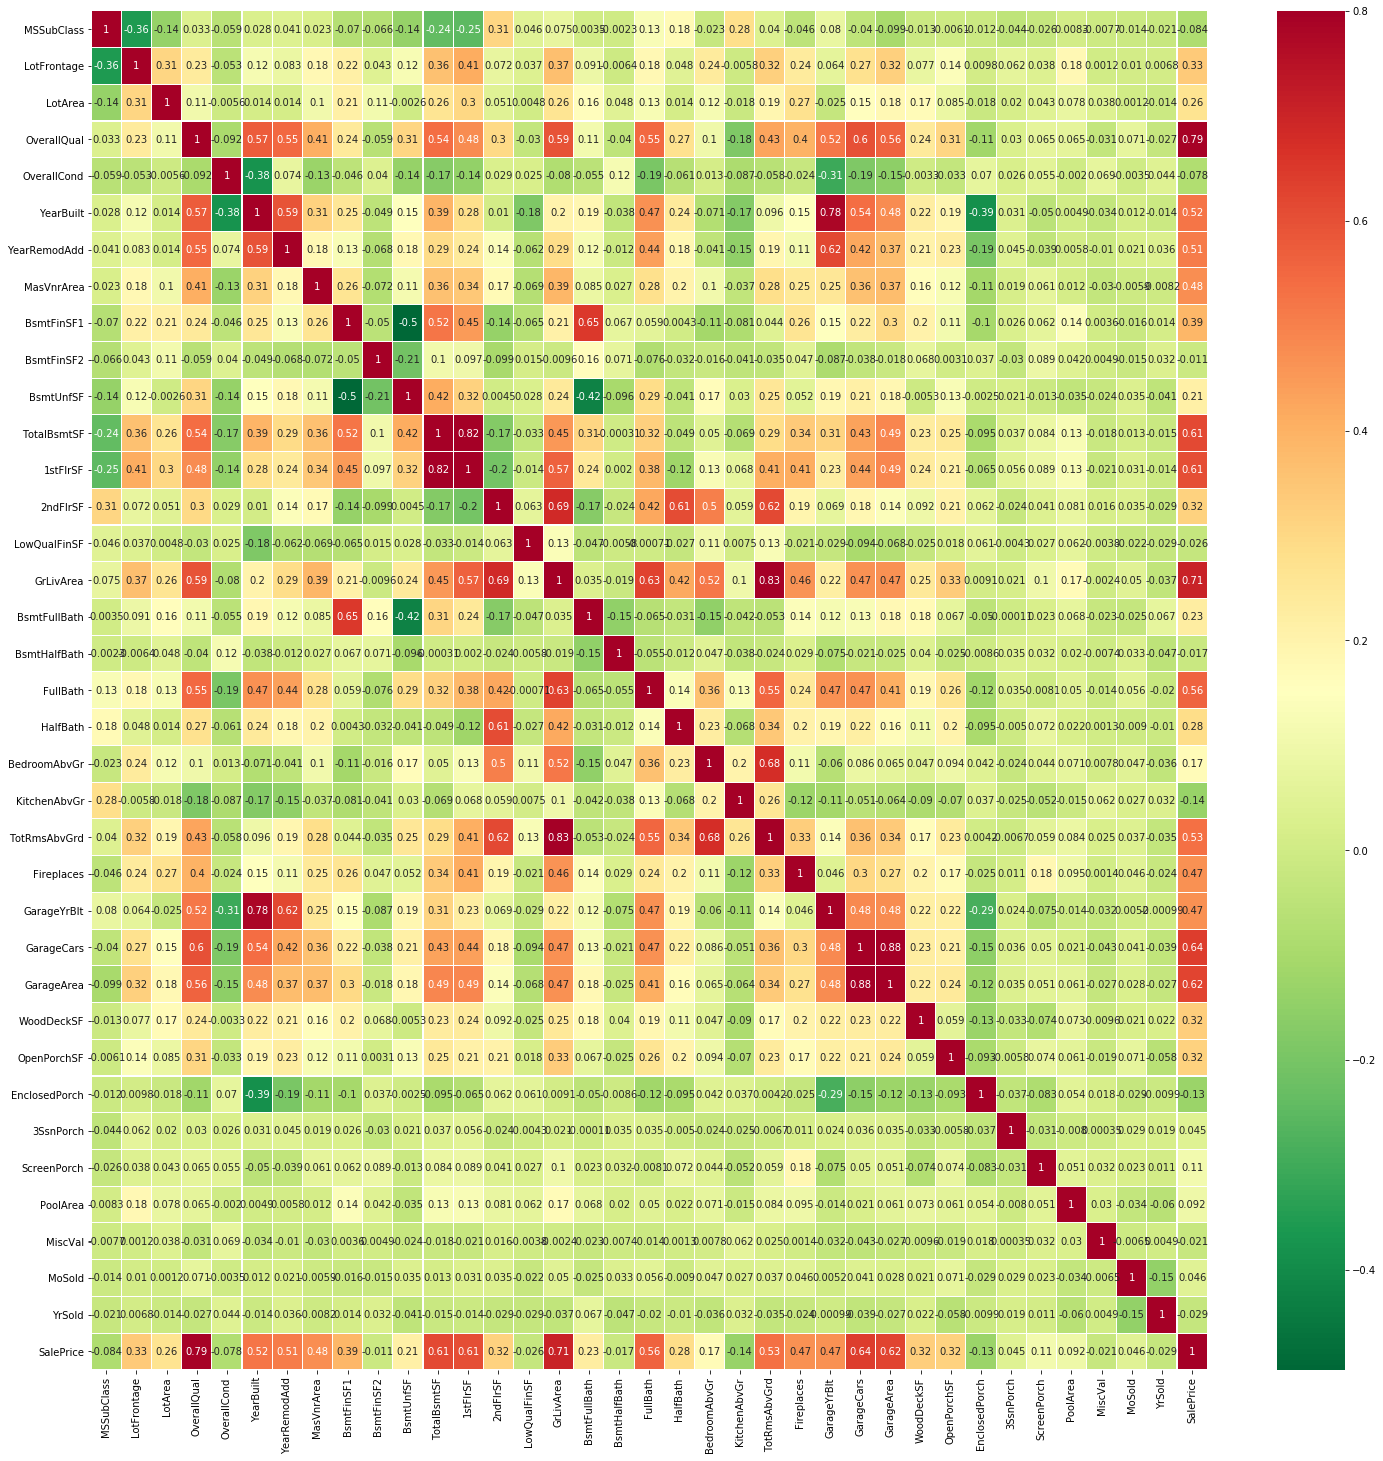

In [21]:
# Correlation Plot
corrmat = houseDF.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(25,25))

#Draw the heatmap using seaborn
colormap = plt.cm.RdYlGn_r
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

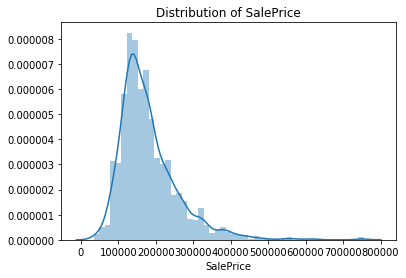

In [22]:
sns.distplot(houseDF["SalePrice"])
plt.title("Distribution of SalePrice")
plt.show()

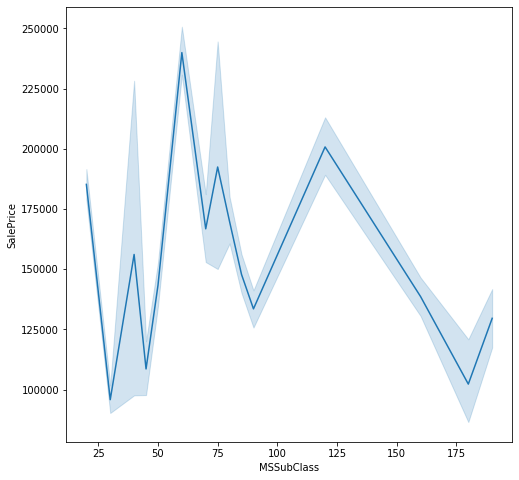

In [23]:
# representation in lineplot for effect of MSSubClass on SalePrice Value
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'MSSubClass', y='SalePrice', data=houseDF)

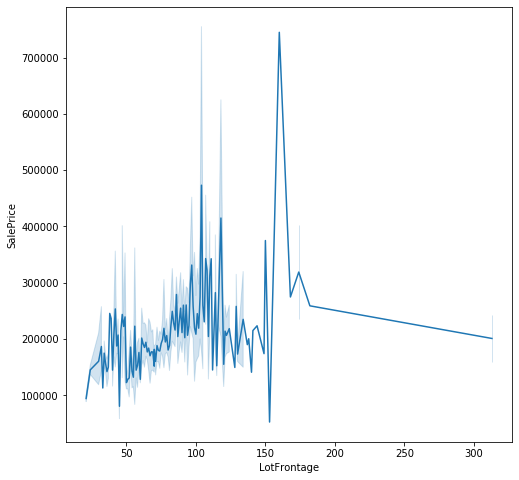

In [24]:
# representation in lineplot for effect of LotFrontage on SalePrice Value
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'LotFrontage', y='SalePrice', data=houseDF)

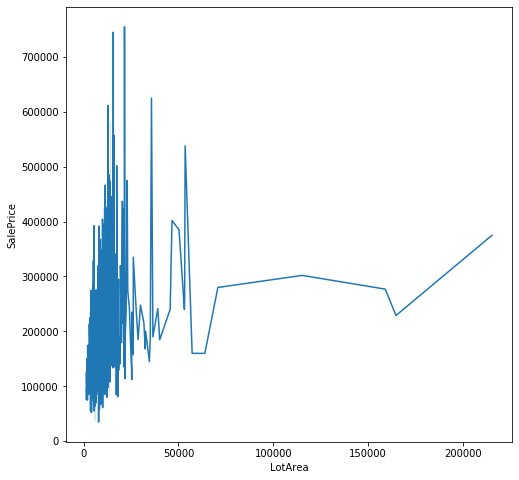

In [25]:
# representation in lineplot for effect of LotArea on SalePrice Value
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'LotArea', y='SalePrice', data=houseDF)

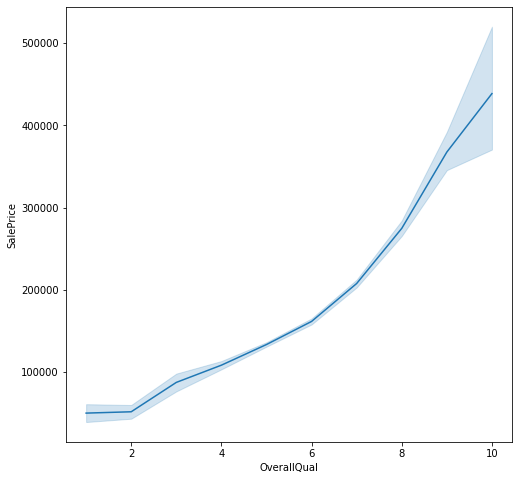

In [26]:
# representation in lineplot for effect of OverallQual on SalePrice Value
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'OverallQual', y='SalePrice', data=houseDF)
#Rates the overall material and finish of the house

#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average
#       5	Average
#       4	Below Average
#       3	Fair
#       2	Poor
#       1	Very Poor

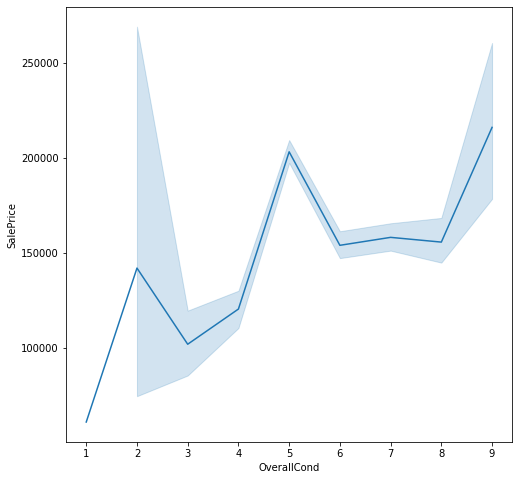

In [27]:
# representation in lineplot for effect of OverallCond on SalePrice Value
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'OverallCond', y='SalePrice', data=houseDF)
#Rates the overall condition of the house

#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average
#       5	Average
#       4	Below Average
#       3	Fair
#       2	Poor
#       1	Very Poor

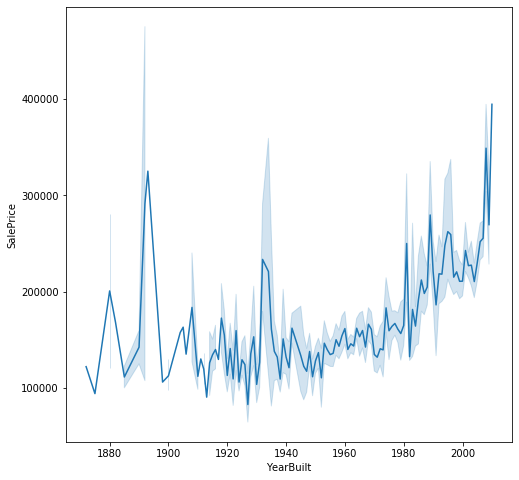

In [28]:
# representation in lineplot for effect of YearBuilt on SalePrice Value
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'YearBuilt', y='SalePrice', data=houseDF)

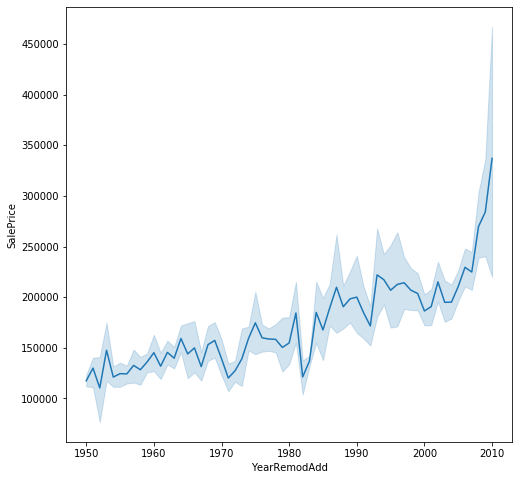

In [29]:
# representation in lineplot for effect of YearRemodAdd on SalePrice Value
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'YearRemodAdd', y='SalePrice', data=houseDF)

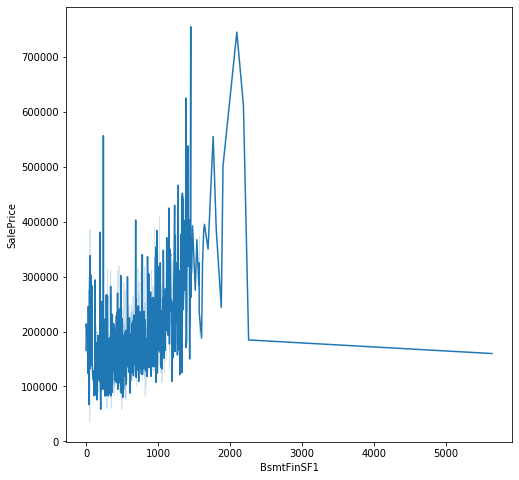

In [30]:
# representation in lineplot for effect of BsmtFinSF1 on SalePrice Value
#BsmtFinSF1: Type 1 finished square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'BsmtFinSF1', y='SalePrice', data=houseDF)

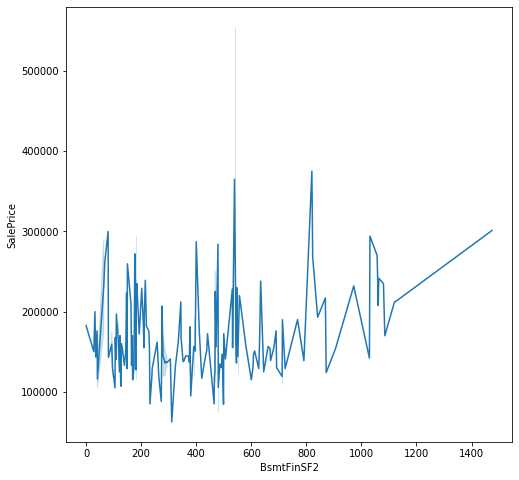

In [31]:
# representation in lineplot for effect of BsmtFinSF2 on SalePrice Value
#BsmtFinSF1: Type 1 finished square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'BsmtFinSF2', y='SalePrice', data=houseDF)

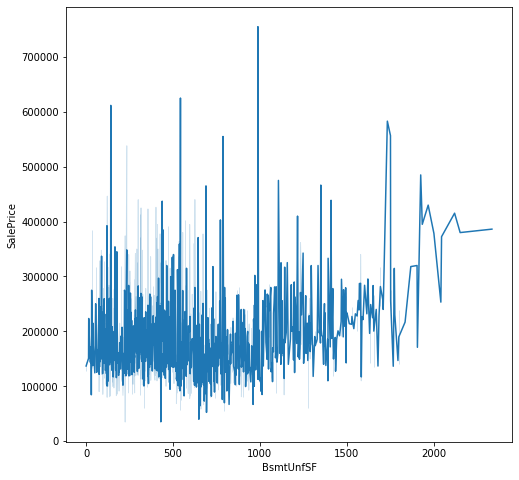

In [32]:
# representation in lineplot for effect of BsmtUnfSF on SalePrice Value
#BsmtUnfSF: Unfinished square feet of basement area
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'BsmtUnfSF', y='SalePrice', data=houseDF)

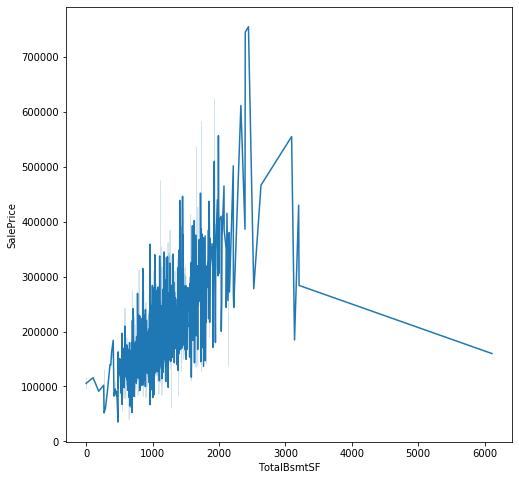

In [33]:
# representation in lineplot for effect of TotalBsmtSF on SalePrice Value
#TotalBsmtSF: Total square feet of basement area
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'TotalBsmtSF', y='SalePrice', data=houseDF)

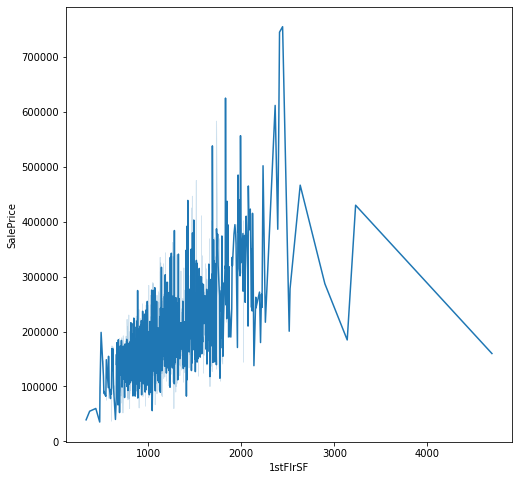

In [34]:
# representation in lineplot for effect of 1stFlrSF on SalePrice Value
#1stFlrSF: First Floor square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = '1stFlrSF', y='SalePrice', data=houseDF)

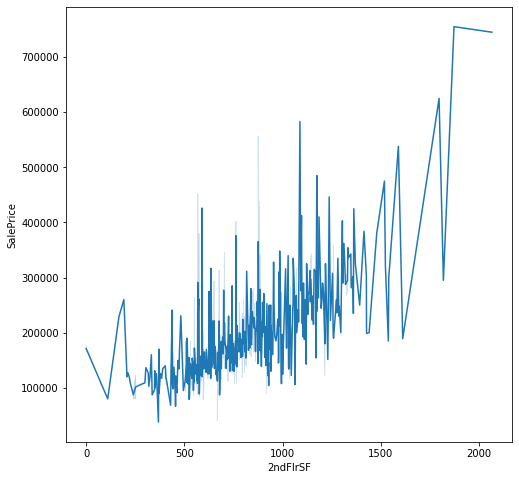

In [35]:
# representation in lineplot for effect of 2ndFlrSF on SalePrice Value
#2ndFlrSF: Second floor square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = '2ndFlrSF', y='SalePrice', data=houseDF)

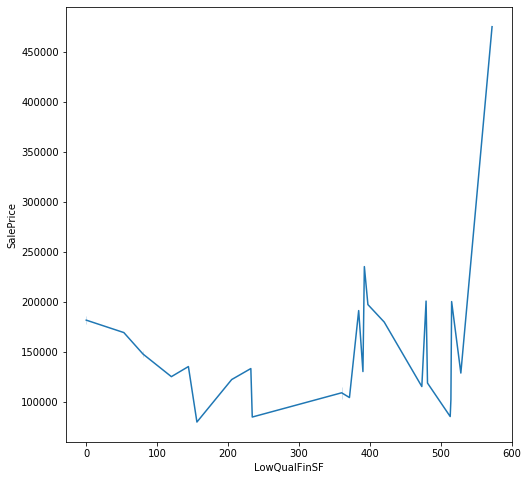

In [36]:
# representation in lineplot for effect of LowQualFinSF on SalePrice Value
#LowQualFinSF: Low quality finished square feet (all floors)
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'LowQualFinSF', y='SalePrice', data=houseDF)

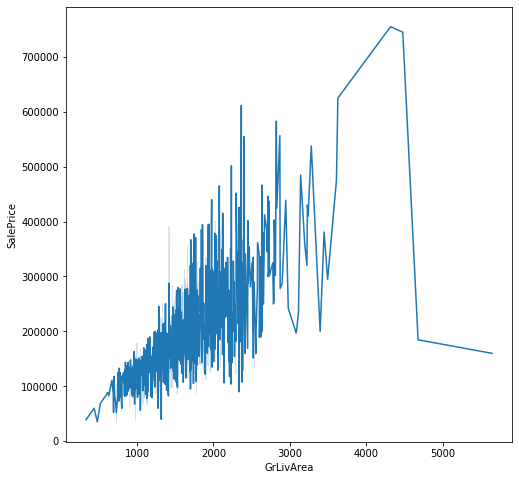

In [37]:
# representation in lineplot for effect of GrLivArea on SalePrice Value
#GrLivArea: Above grade (ground) living area square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'GrLivArea', y='SalePrice', data=houseDF)

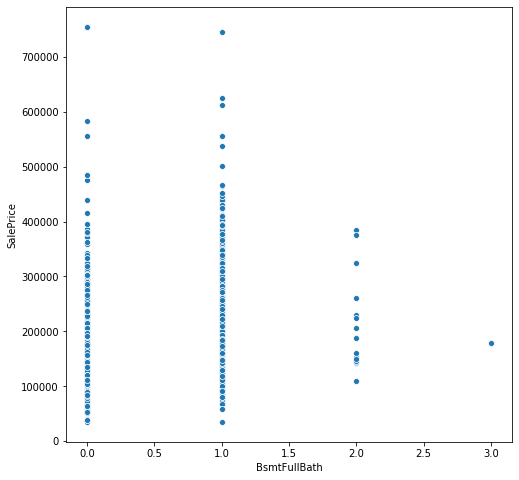

In [38]:
# representation in scatterplot for effect of BsmtFullBath on SalePrice Value
#BsmtFullBath: Basement full bathrooms
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'BsmtFullBath', y='SalePrice', data=houseDF)

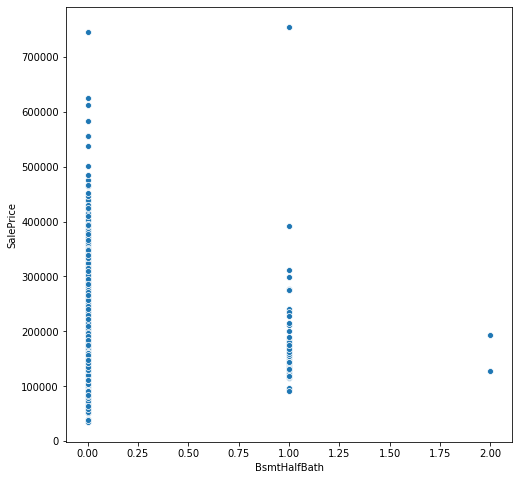

In [39]:
# representation in scatterplot for effect of BsmtHalfBath on SalePrice Value
#BsmtHalfBath: Basement half bathrooms
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'BsmtHalfBath', y='SalePrice', data=houseDF)

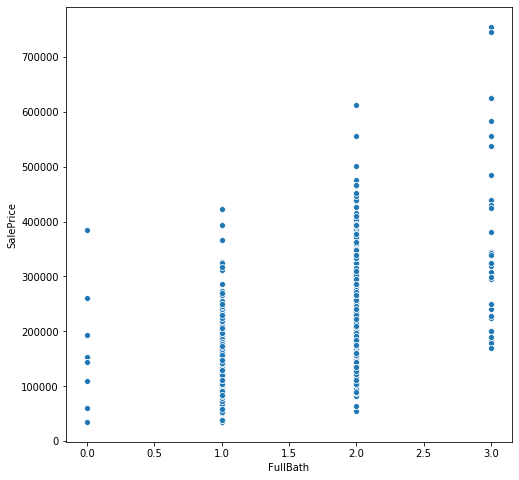

In [40]:
# representation in scatterplot for effect of FullBath on SalePrice Value
#FullBath: Full bathrooms above grade
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'FullBath', y='SalePrice', data=houseDF)

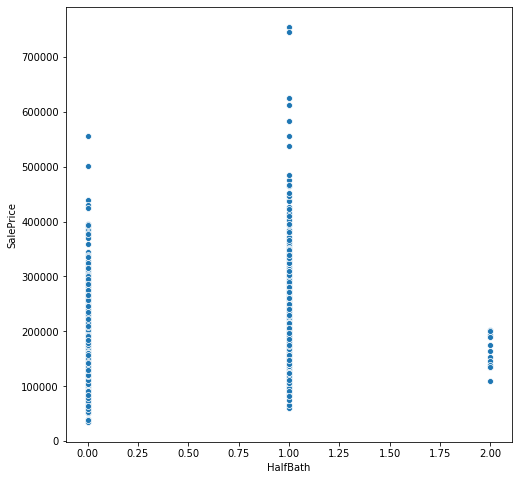

In [41]:
# representation in scatterplot for effect of HalfBath on SalePrice Value
#HalfBath: Half baths above grade
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'HalfBath', y='SalePrice', data=houseDF)

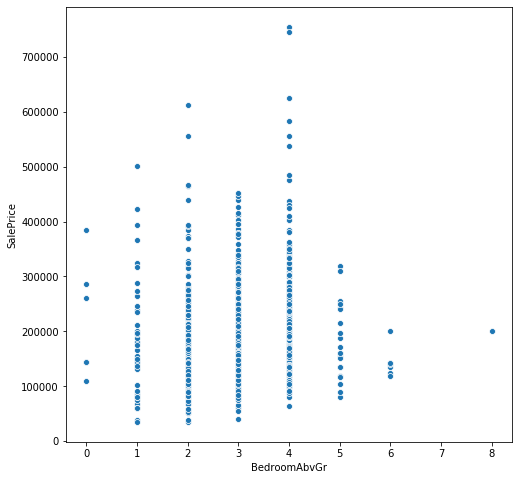

In [42]:
# representation in scatterplot for effect of BedroomAbvGr on SalePrice Value
#Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'BedroomAbvGr', y='SalePrice', data=houseDF)

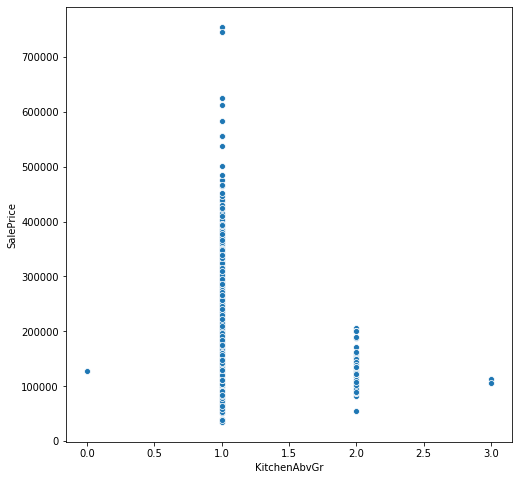

In [43]:
# representation in scatterplot for effect of KitchenAbvGr on SalePrice Value
#Kitchen: Kitchens above grade
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'KitchenAbvGr', y='SalePrice', data=houseDF)

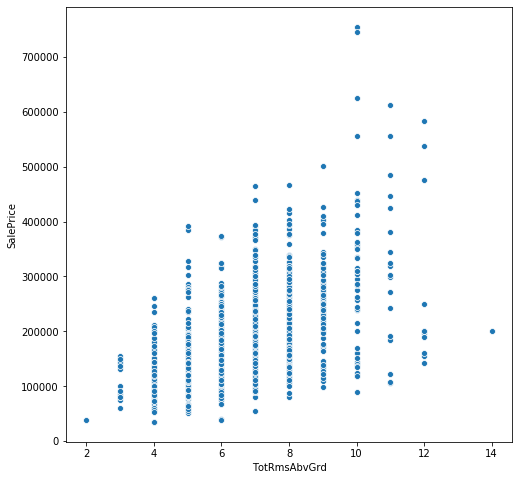

In [44]:
# representation in scatterplot for effect of TotRmsAbvGrd on SalePrice Value
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'TotRmsAbvGrd', y='SalePrice', data=houseDF)

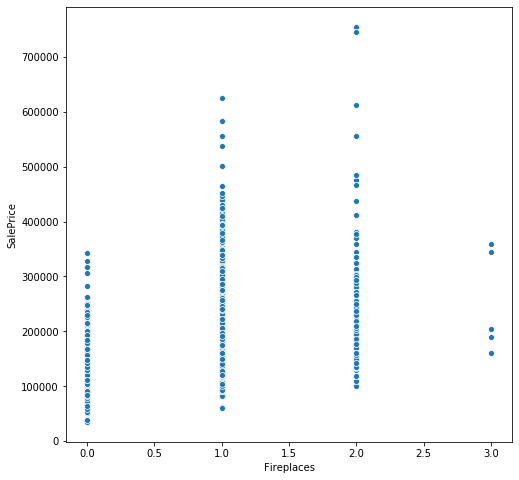

In [45]:
# representation in scatterplot for effect of Fireplaces on SalePrice Value
#Fireplaces: Number of fireplaces
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'Fireplaces', y='SalePrice', data=houseDF)

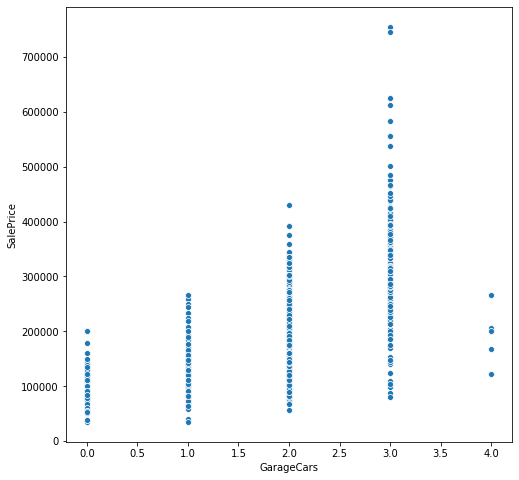

In [46]:
# representation in scatterplot for effect of GarageCars on SalePrice Value
#GarageCars: Size of garage in car capacity
f, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x = 'GarageCars', y='SalePrice', data=houseDF)

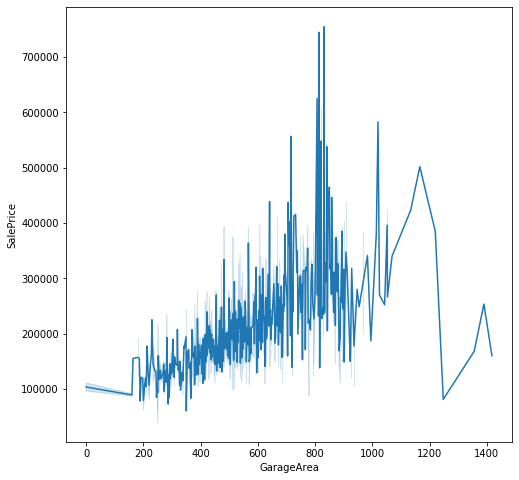

In [47]:
# representation in lineplot for effect of GarageArea on SalePrice Value
#GarageArea: Size of garage in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'GarageArea', y='SalePrice', data=houseDF)

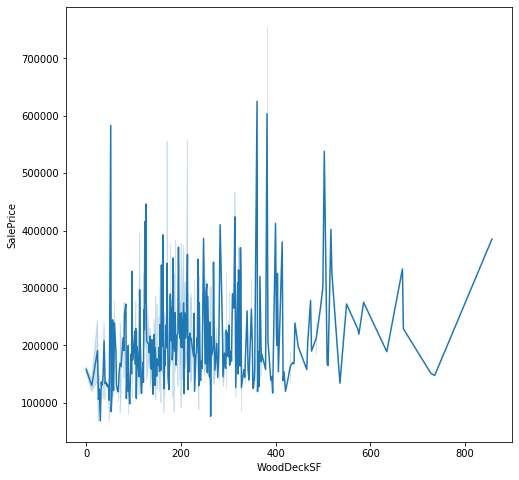

In [48]:
# representation in lineplot for effect of WoodDeckSF on SalePrice Value
#WoodDeckSF: Wood deck area in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'WoodDeckSF', y='SalePrice', data=houseDF)

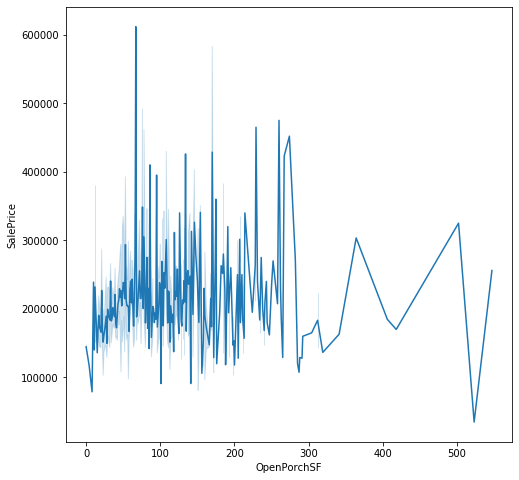

In [49]:
# representation in lineplot for effect of OpenPorchSF on SalePrice Value
#WoodDeckSF: Wood deck area in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'OpenPorchSF', y='SalePrice', data=houseDF)

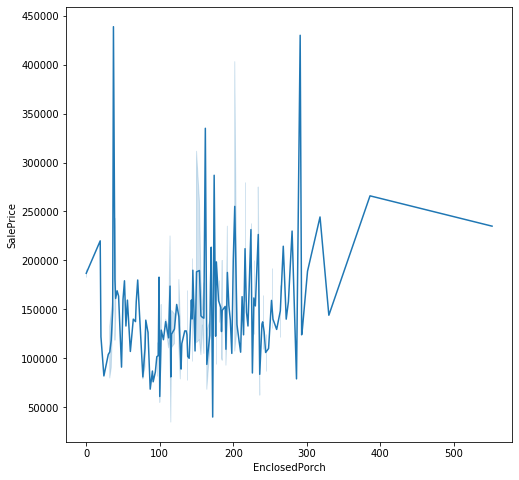

In [50]:
# representation in lineplot for effect of EnclosedPorch on SalePrice Value
#EnclosedPorch: Enclosed porch area in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'EnclosedPorch', y='SalePrice', data=houseDF)

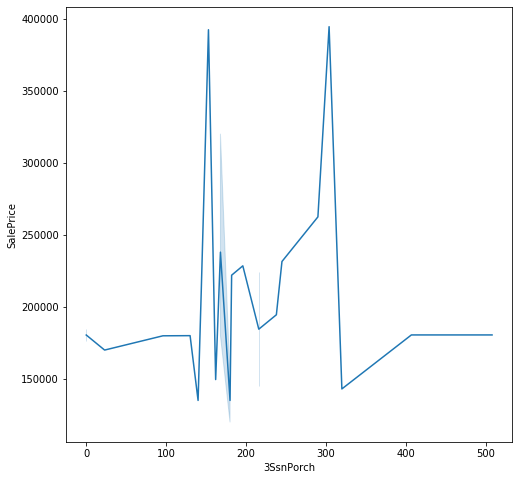

In [51]:
# representation in lineplot for effect of 3SsnPorch on SalePrice Value
#3SsnPorch: Three season porch area in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = '3SsnPorch', y='SalePrice', data=houseDF)

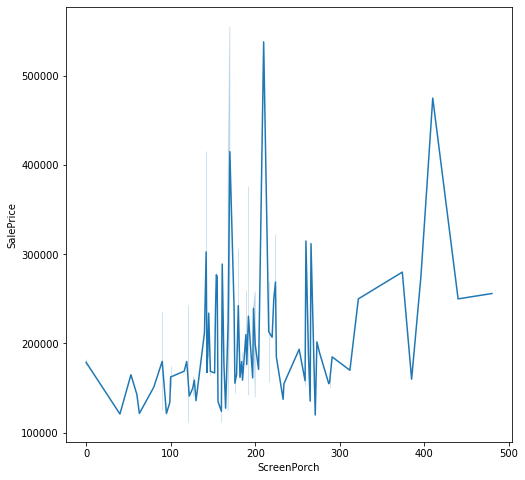

In [52]:
# representation in lineplot for effect of ScreenPorch on SalePrice Value
#ScreenPorch: Screen porch area in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'ScreenPorch', y='SalePrice', data=houseDF)

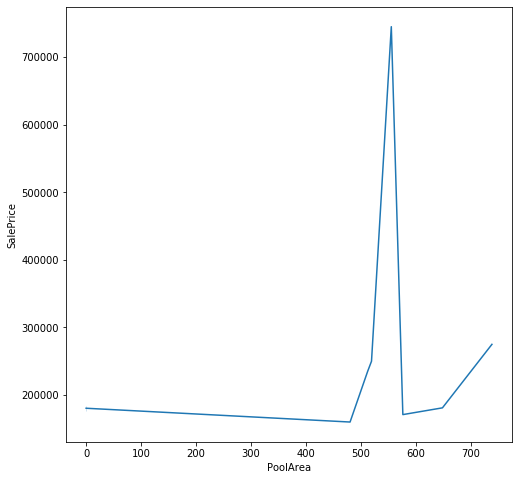

In [53]:
# representation in lineplot for effect of PoolArea on SalePrice Value
#PoolArea: Pool area in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'PoolArea', y='SalePrice', data=houseDF)

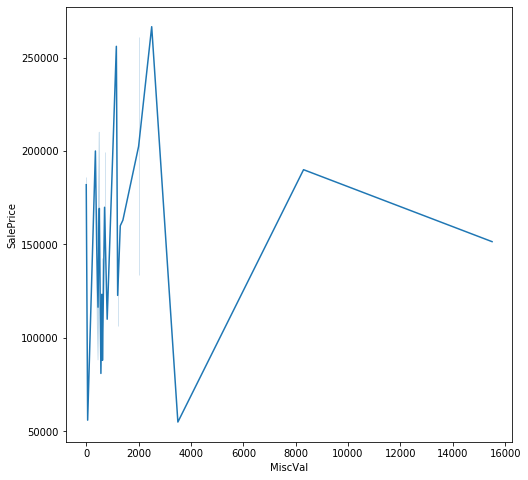

In [54]:
# representation in lineplot for effect of MiscVal on SalePrice Value
#MiscVal: $Value of miscellaneous feature
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'MiscVal', y='SalePrice', data=houseDF)

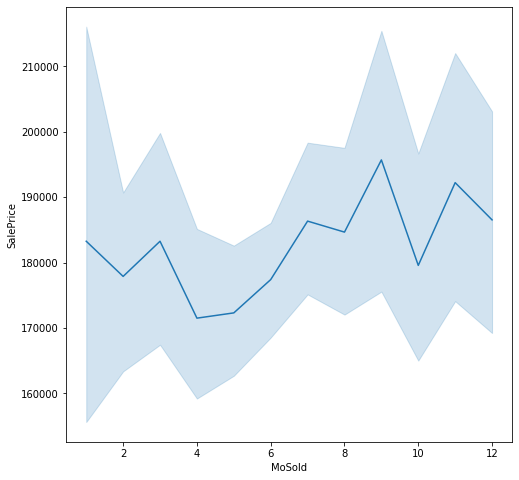

In [55]:
# representation in lineplot for effect of MoSold on SalePrice Value
#MoSold: Month Sold (MM)
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'MoSold', y='SalePrice', data=houseDF)

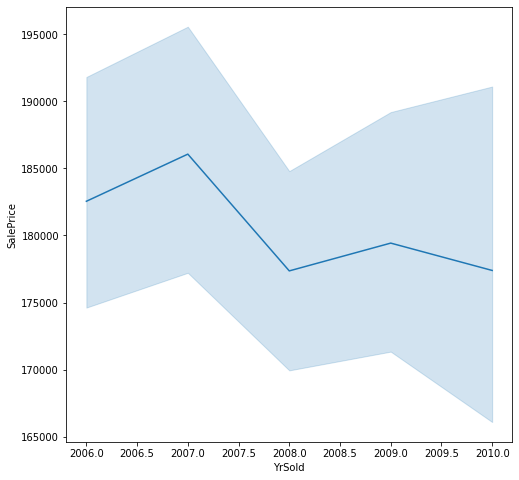

In [56]:
# representation in lineplot for effect of YrSold on SalePrice Value
#YrSold: Year Sold (YYYY)
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'YrSold', y='SalePrice', data=houseDF)

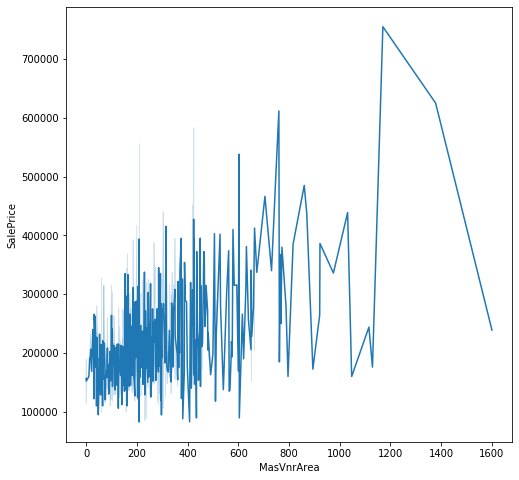

In [57]:
# representation in lineplot for effect of MasVnrArea on SalePrice Value
# MasVnrArea: Masonry veneer area in square feet
f, ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'MasVnrArea', y='SalePrice', data=houseDF)

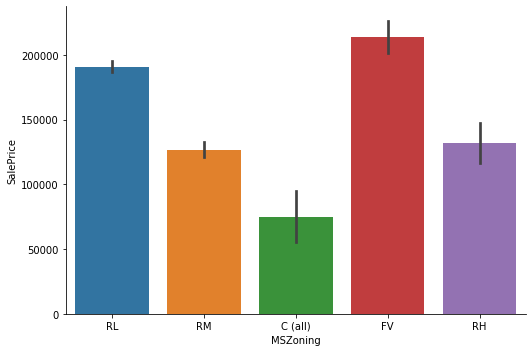

In [58]:
# representation in factorplot for effect of MSZoning on SalePrice Value
sns.factorplot(x = 'MSZoning', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)

#MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

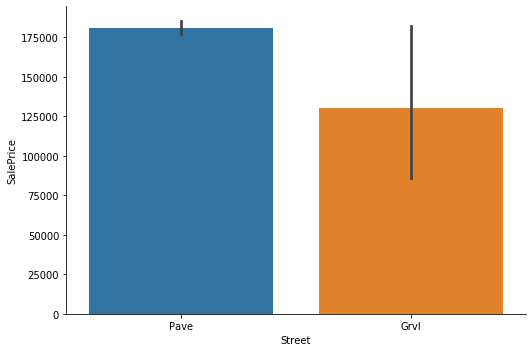

In [59]:
# representation in factorplot for effect of Street on SalePrice Value
sns.factorplot(x = 'Street', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)

#Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

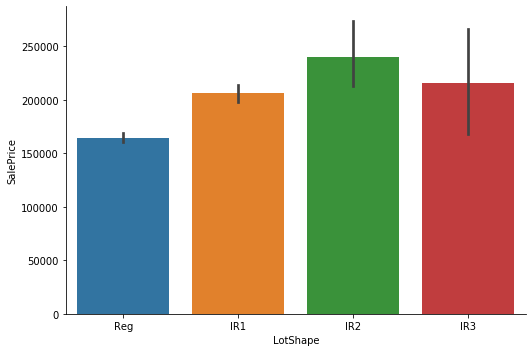

In [60]:
# representation in factorplot for effect of LotShape on SalePrice Value
sns.factorplot(x = 'LotShape', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)

#LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

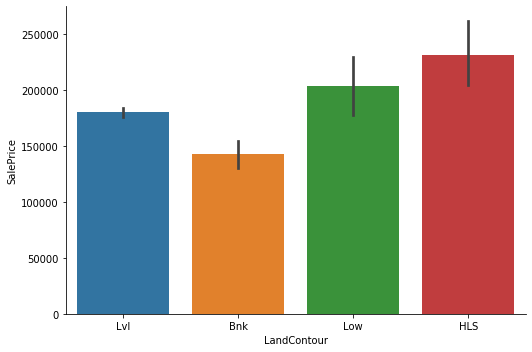

In [61]:
# representation in factorplot for effect of LandContour on SalePrice Value
sns.factorplot(x = 'LandContour', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)

#LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

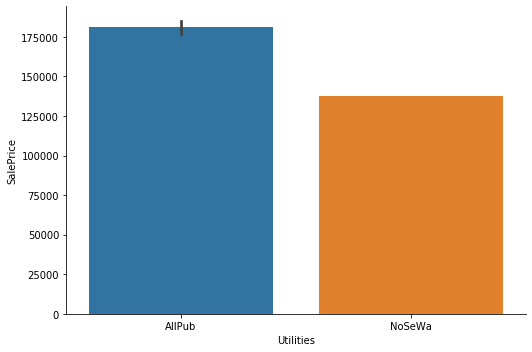

In [62]:
# representation in factorplot for effect of Utilities on SalePrice Value
sns.factorplot(x = 'Utilities', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)

#Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

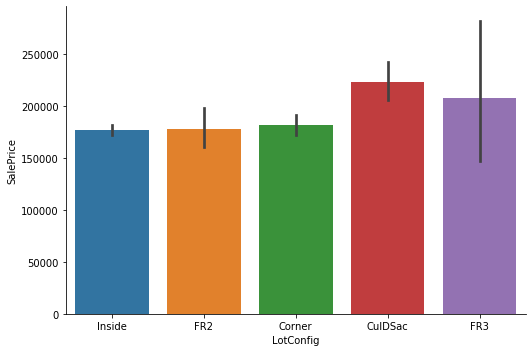

In [63]:
# representation in factorplot for effect of LotConfig on SalePrice Value
sns.factorplot(x = 'LotConfig', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)

#LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

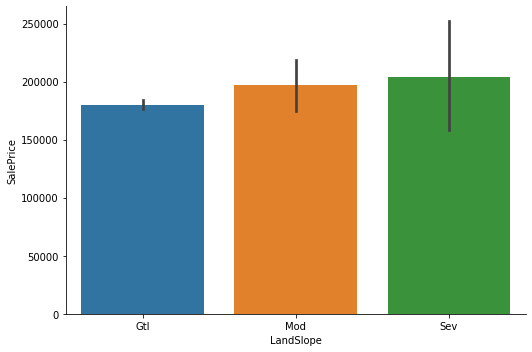

In [64]:
# representation in factorplot for effect of LandSlope on SalePrice Value
sns.factorplot(x = 'LandSlope', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)

#LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

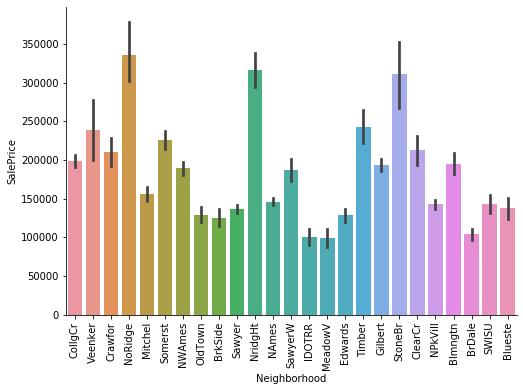

In [65]:
# representation in factorplot for effect of Neighborhood on SalePrice Value
g=sns.factorplot(x = 'Neighborhood', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=90)

#Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

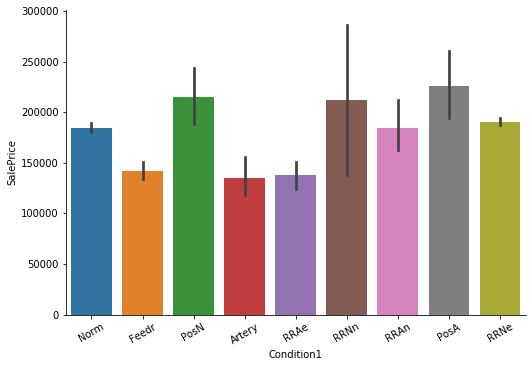

In [66]:
# representation in factorplot for effect of Condition1 on SalePrice Value
g=sns.factorplot(x = 'Condition1', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

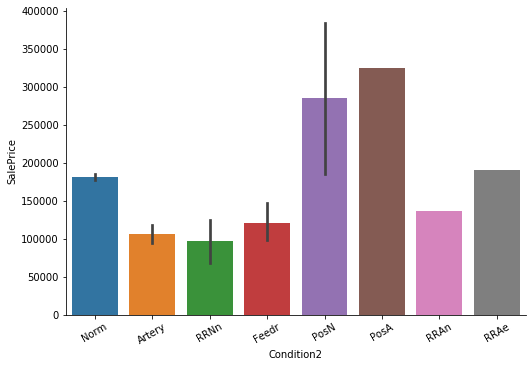

In [67]:
# representation in factorplot for effect of Condition2 on SalePrice Value
g=sns.factorplot(x = 'Condition2', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

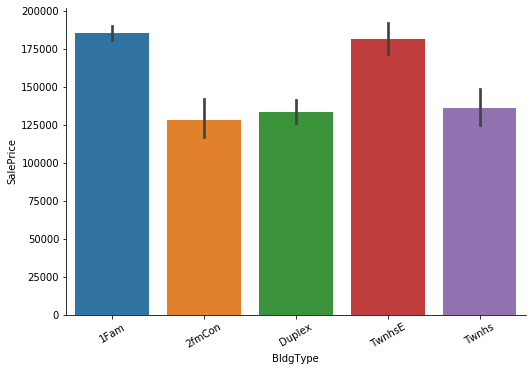

In [68]:
# representation in factorplot for effect of BldgType on SalePrice Value
g=sns.factorplot(x = 'BldgType', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

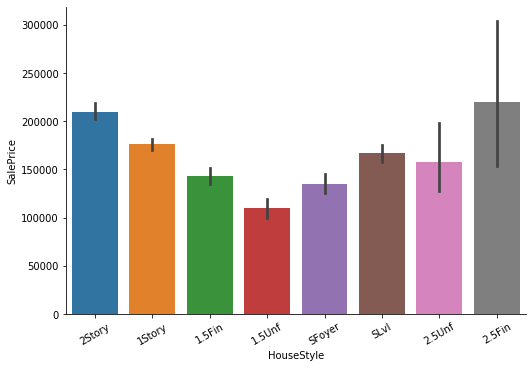

In [69]:
# representation in factorplot for effect of HouseStyle on SalePrice Value
g=sns.factorplot(x = 'HouseStyle', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

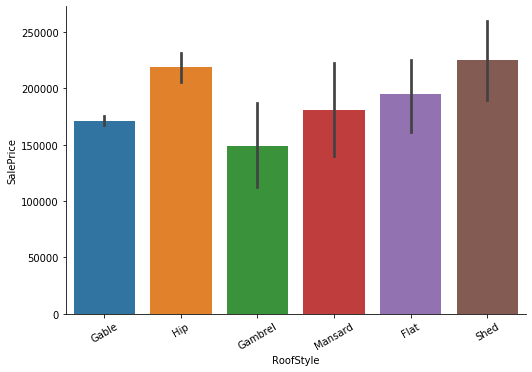

In [70]:
# representation in factorplot for effect of RoofStyle on SalePrice Value
g=sns.factorplot(x = 'RoofStyle', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

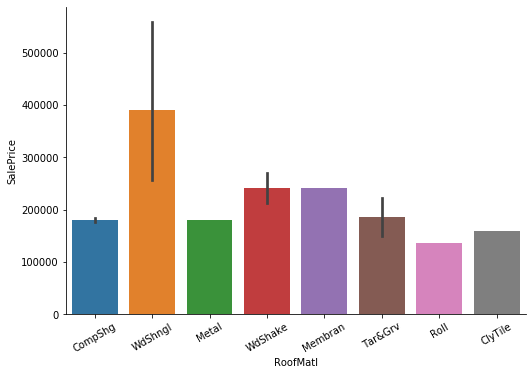

In [71]:
# representation in factorplot for effect of RRoofMatl on SalePrice Value
g=sns.factorplot(x = 'RoofMatl', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

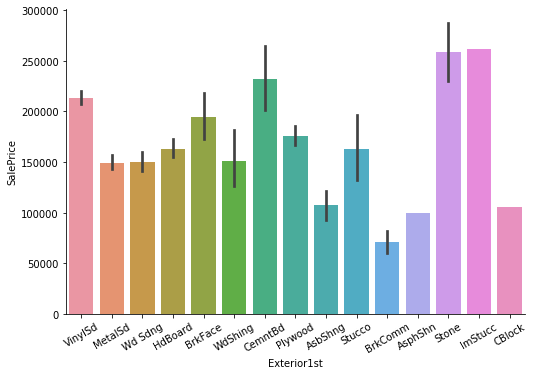

In [72]:
# representation in factorplot for effect of Exterior1st on SalePrice Value
g=sns.factorplot(x = 'Exterior1st', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

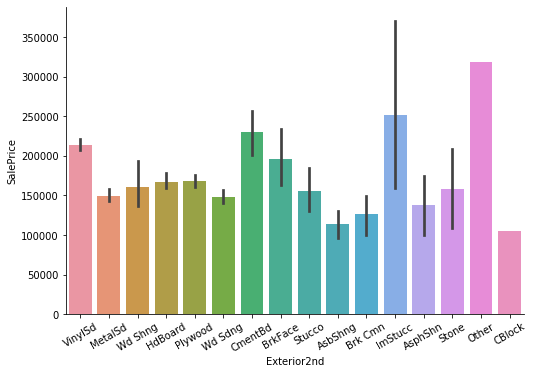

In [73]:
# representation in factorplot for effect of Exterior2nd on SalePrice Value
g=sns.factorplot(x = 'Exterior2nd', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

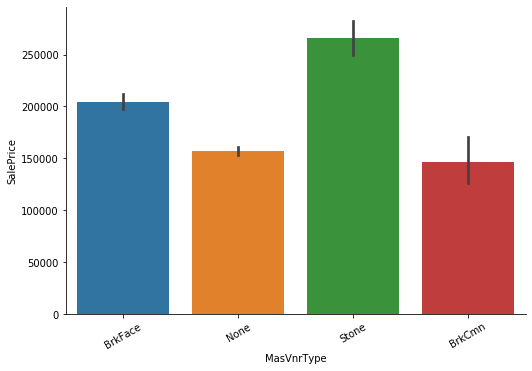

In [74]:
# representation in factorplot for effect of MasVnrType on SalePrice Value
g=sns.factorplot(x = 'MasVnrType', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

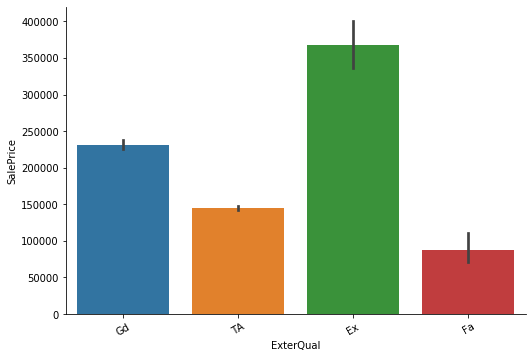

In [75]:
# representation in factorplot for effect of ExterQual on SalePrice Value
g=sns.factorplot(x = 'ExterQual', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

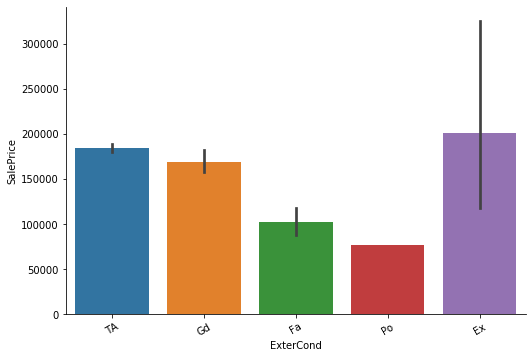

In [76]:
# representation in factorplot for effect of ExterCond on SalePrice Value
g=sns.factorplot(x = 'ExterCond', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

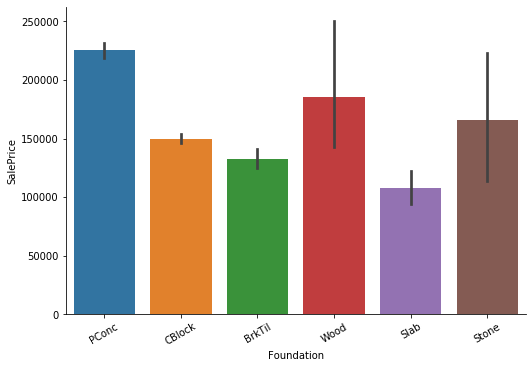

In [77]:
# representation in factorplot for effect of Foundation on SalePrice Value
g=sns.factorplot(x = 'Foundation', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

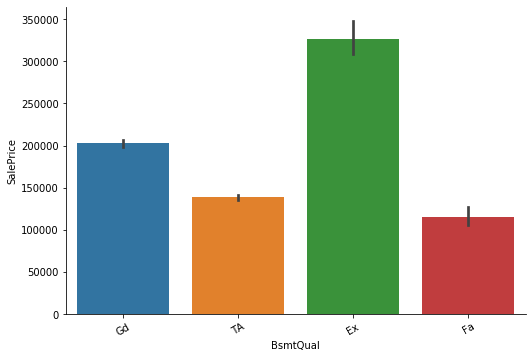

In [78]:
# representation in factorplot for effect of BsmtQual on SalePrice Value
g=sns.factorplot(x = 'BsmtQual', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

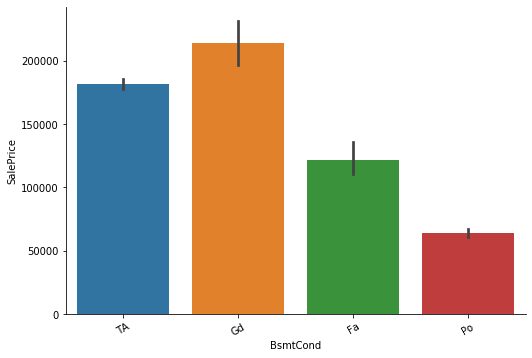

In [79]:
# representation in factorplot for effect of BsmtCond on SalePrice Value
g=sns.factorplot(x = 'BsmtCond', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

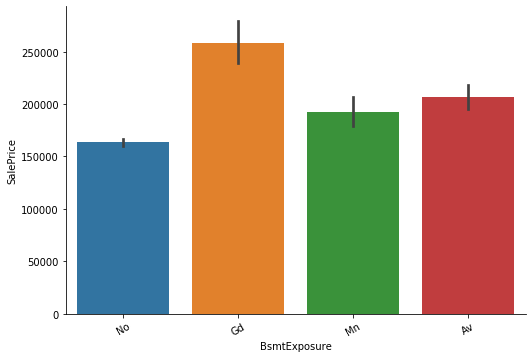

In [80]:
# representation in factorplot for effect of BsmtExposure on SalePrice Value
g=sns.factorplot(x = 'BsmtExposure', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

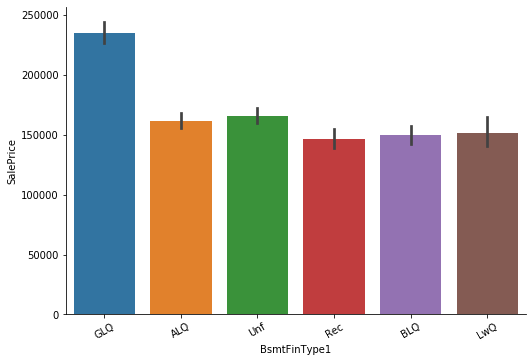

In [81]:
# representation in factorplot for effect of BsmtFinType1 on SalePrice Value
g=sns.factorplot(x = 'BsmtFinType1', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

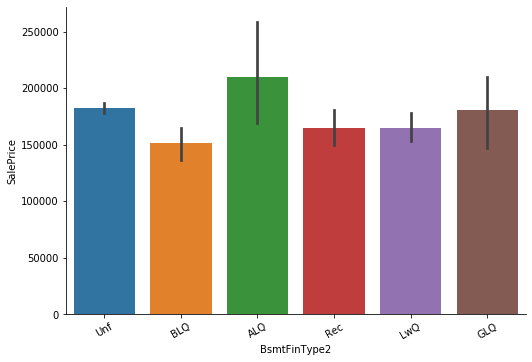

In [82]:
# representation in factorplot for effect of BsmtFinType2 on SalePrice Value
g=sns.factorplot(x = 'BsmtFinType2', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

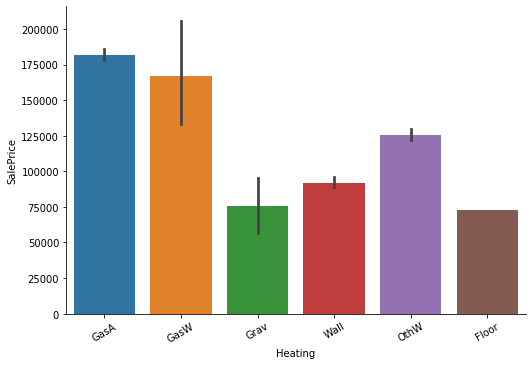

In [83]:
# representation in factorplot for effect of Heating on SalePrice Value
g=sns.factorplot(x = 'Heating', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

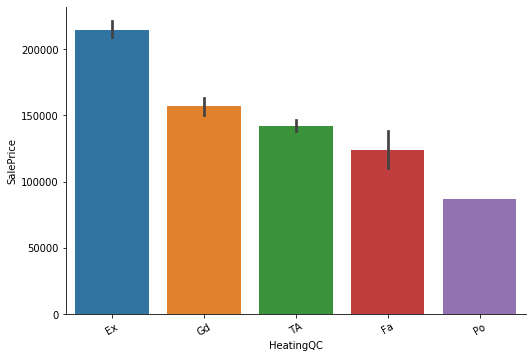

In [84]:
# representation in factorplot for effect of HeatingQC on SalePrice Value
g=sns.factorplot(x = 'HeatingQC', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

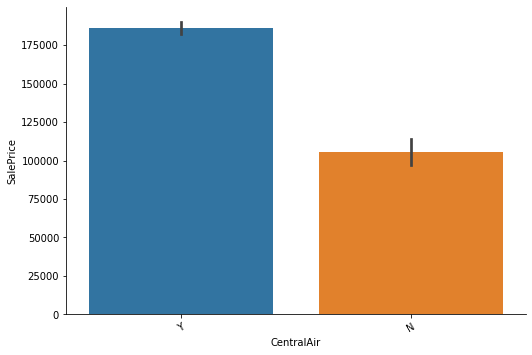

In [85]:
# representation in factorplot for effect of CentralAir on SalePrice Value
g=sns.factorplot(x = 'CentralAir', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#CentralAir: Central air conditioning

       N	No
       Y	Yes

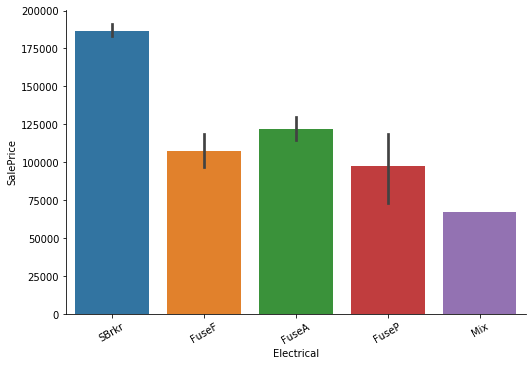

In [86]:
# representation in factorplot for effect of Electrical on SalePrice Value
g=sns.factorplot(x = 'Electrical', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

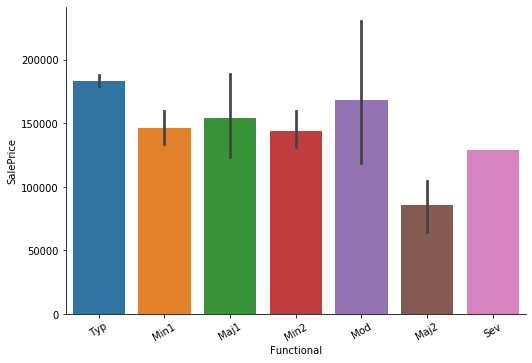

In [87]:
# representation in factorplot for effect of Functional on SalePrice Value
g=sns.factorplot(x = 'Functional', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

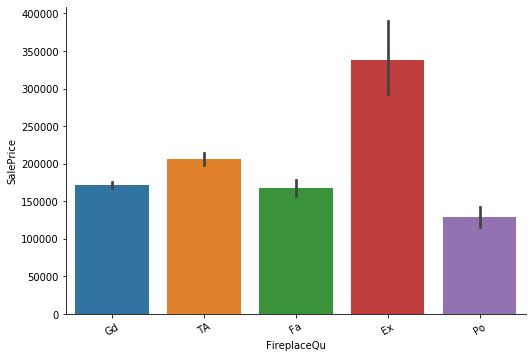

In [88]:
# representation in factorplot for effect of FireplaceQu on SalePrice Value
g=sns.factorplot(x = 'FireplaceQu', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average-Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

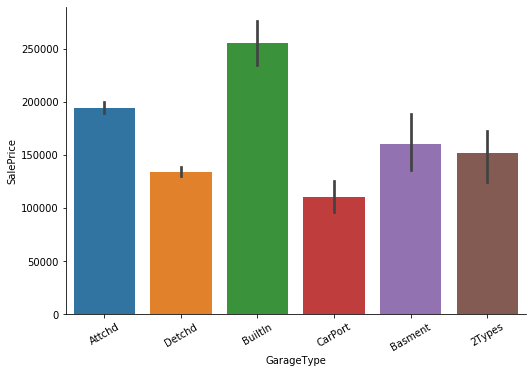

In [89]:
# representation in factorplot for effect of GarageType on SalePrice Value
g=sns.factorplot(x = 'GarageType', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

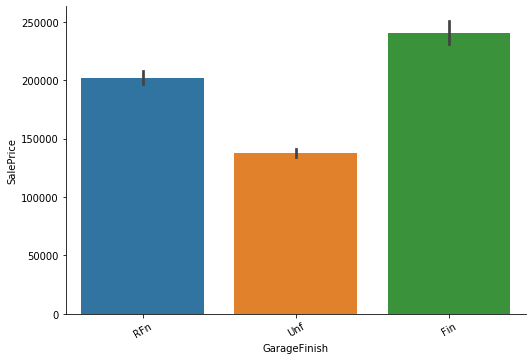

In [90]:
# representation in factorplot for effect of GarageFinish on SalePrice Value
g=sns.factorplot(x = 'GarageFinish', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

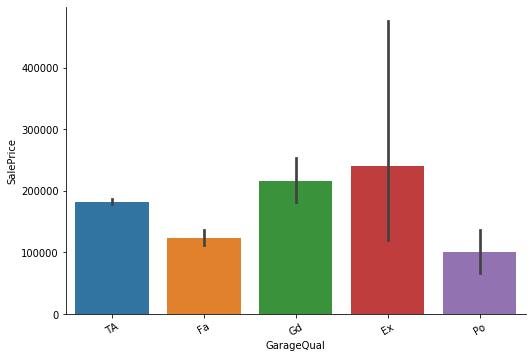

In [91]:
# representation in factorplot for effect of GarageQual on SalePrice Value
g=sns.factorplot(x = 'GarageQual', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

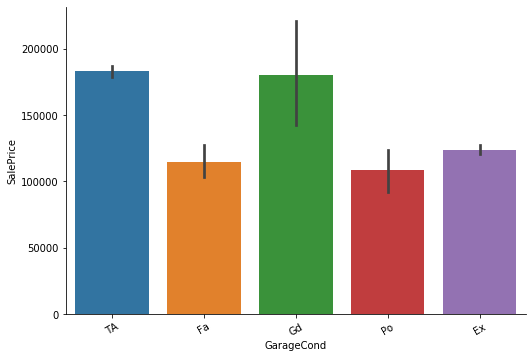

In [92]:
# representation in factorplot for effect of GarageCond on SalePrice Value
g=sns.factorplot(x = 'GarageCond', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

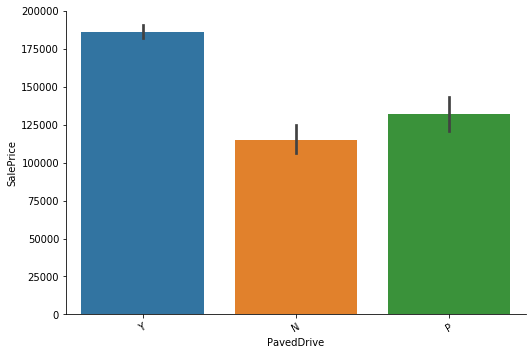

In [93]:
# representation in factorplot for effect of PavedDrive on SalePrice Value
g=sns.factorplot(x = 'PavedDrive', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

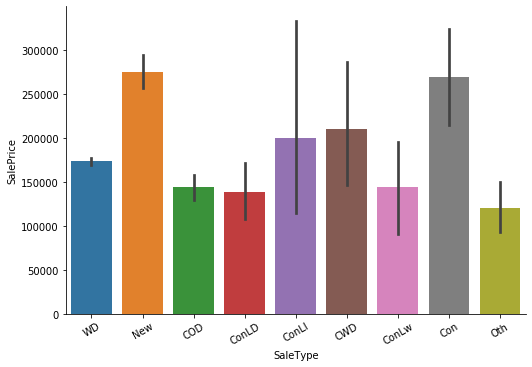

In [94]:
# representation in factorplot for effect of SaleType on SalePrice Value
g=sns.factorplot(x = 'SaleType', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

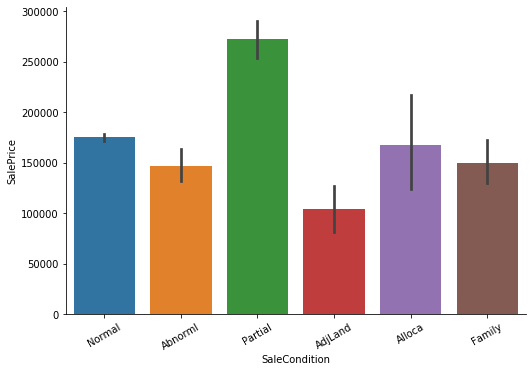

In [95]:
# representation in factorplot for effect of SaleCondition on SalePrice Value
g=sns.factorplot(x = 'SaleCondition', y='SalePrice', kind ='bar' ,aspect = 1.5, data=houseDF)
g.set_xticklabels(rotation=30)

#SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation-two linked properties with separate deeds,typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [96]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

houseDF['MSZoning'] = lb_make.fit_transform(houseDF['MSZoning'])
houseDF['Street'] = lb_make.fit_transform(houseDF['Street'])
houseDF['LotShape'] = lb_make.fit_transform(houseDF['LotShape'])
houseDF['LandContour'] = lb_make.fit_transform(houseDF['LandContour'])
houseDF['Utilities'] = lb_make.fit_transform(houseDF['Utilities'])
houseDF['LotConfig'] = lb_make.fit_transform(houseDF['LotConfig'])
houseDF['LandSlope'] = lb_make.fit_transform(houseDF['LandSlope'])
houseDF['Neighborhood'] = lb_make.fit_transform(houseDF['Neighborhood'])
houseDF['Condition1'] = lb_make.fit_transform(houseDF['Condition1'])
houseDF['Condition2'] = lb_make.fit_transform(houseDF['Condition2'])
houseDF['BldgType'] = lb_make.fit_transform(houseDF['BldgType'])
houseDF['HouseStyle'] = lb_make.fit_transform(houseDF['HouseStyle'])
houseDF['RoofStyle'] = lb_make.fit_transform(houseDF['RoofStyle'])
houseDF['RoofMatl'] = lb_make.fit_transform(houseDF['RoofMatl'])
houseDF['Exterior1st'] = lb_make.fit_transform(houseDF['Exterior1st'])
houseDF['Exterior2nd'] = lb_make.fit_transform(houseDF['Exterior2nd'])
houseDF['MasVnrType'] = lb_make.fit_transform(houseDF['MasVnrType'])
houseDF['ExterQual'] = lb_make.fit_transform(houseDF['ExterQual'])
houseDF['ExterCond'] = lb_make.fit_transform(houseDF['ExterCond'])
houseDF['Foundation'] = lb_make.fit_transform(houseDF['Foundation'])
houseDF['BsmtQual'] = lb_make.fit_transform(houseDF['BsmtQual'])
houseDF['BsmtCond'] = lb_make.fit_transform(houseDF['BsmtCond'])
houseDF['BsmtExposure'] = lb_make.fit_transform(houseDF['BsmtExposure'])
houseDF['BsmtFinType1'] = lb_make.fit_transform(houseDF['BsmtFinType1'])
houseDF['BsmtFinType2'] = lb_make.fit_transform(houseDF['BsmtFinType2'])
houseDF['Heating'] = lb_make.fit_transform(houseDF['Heating'])
houseDF['HeatingQC'] = lb_make.fit_transform(houseDF['HeatingQC'])
houseDF['CentralAir'] = lb_make.fit_transform(houseDF['CentralAir'])
houseDF['Electrical'] = lb_make.fit_transform(houseDF['Electrical'])
houseDF['KitchenQual'] = lb_make.fit_transform(houseDF['KitchenQual'])
houseDF['Functional'] = lb_make.fit_transform(houseDF['Functional'])
houseDF['FireplaceQu'] = lb_make.fit_transform(houseDF['FireplaceQu'])
houseDF['GarageType'] = lb_make.fit_transform(houseDF['GarageType'])
houseDF['GarageFinish'] = lb_make.fit_transform(houseDF['GarageFinish'])
houseDF['GarageQual'] = lb_make.fit_transform(houseDF['GarageQual'])
houseDF['GarageCond'] = lb_make.fit_transform(houseDF['GarageCond'])
houseDF['PavedDrive'] = lb_make.fit_transform(houseDF['PavedDrive'])
houseDF['SaleType'] = lb_make.fit_transform(houseDF['SaleType'])
houseDF['SaleCondition'] = lb_make.fit_transform(houseDF['SaleCondition'])

In [97]:
y = houseDF['SalePrice']
X = houseDF.drop('SalePrice', axis = 1)
print(X.shape)
print(y.shape)

(1460, 75)
(1460,)


In [98]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# define feature selection
fs = SelectKBest(score_func=mutual_info_regression,k=25)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
print(y.shape)
#houseDF.head(25)

(1460, 25)
(1460,)


In [99]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X_selected)


In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca=pca.fit_transform(x)

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [102]:
#lets use linear regression and check max  r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,X_pca,y)




max r2 score corresponding to random state: 95 is 0.8564434721420826


In [103]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X_pca,y)
gknr.best_params_

{'n_neighbors': 27}

In [104]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=27)
r_state=maxr2_score(knr,X_pca,y)



max r2 score corresponding to random state: 95 is 0.8896215642312998


In [105]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,X_pca,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,X_pca,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,X_pca,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,X_pca,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  0.7731934739032134
Standard deviation in r2 score for Linear Regression :  0.06749704660766383


 Mean r2 score for KNN Regression :  0.8228553746028648
Standard deviation in r2 score for KNN Regression :  0.0291084066312155


In [106]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X_pca,y)
clf.best_params_

{'alpha': 1}

In [107]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,X_pca,y)



max r2 score corresponding to random state: 95 is 0.8564432397700458


In [108]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,X_pca,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,X_pca,y,scoring='r2').std())

Mean r2 score for lasso regression :  0.7731936271037608
standard deviation for lasso ragression :  0.06749568438181716


In [109]:
#now we will try to use gradient boosting technique
#for getting best set of parameter we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(X_pca,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [110]:
#now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
r_state=maxr2_score(gbr,X_pca,y)
print('Mean r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,X_pca,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,X_pca,y,cv=5,scoring='r2').std())



max r2 score corresponding to random state: 87 is 0.9003529278887927
Mean r2 score for gradient boosting Regrssion :  0.8304003408866691
Standard Deviation r2 score for gradient boosting Regrssion :  0.051648756996669466


In [111]:
#Now Lets use ada boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(X_pca,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [112]:
ada_reg=AdaBoostRegressor(base_estimator= DecisionTreeRegressor(),learning_rate=0.001,n_estimators=100)
#lets check maximum r2_score corresponding to this
r_state=maxr2_score(ada_reg,x,y)
print('Mean r2 score for ada boosting regression :',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for ada boosting regression :',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())



max r2 score corresponding to random state: 85 is 0.903068133667286
Mean r2 score for ada boosting regression : 0.8410060466142255
Standard Deviation r2 score for ada boosting regression : 0.028710742755836845


In [113]:
# we tried all the model and till now ada boost regression is the best random state corresponding to highest r2_score is 85
x_train,x_test,y_train,y_test=train_test_split(X_pca,y,random_state=85,test_size=0.20)
ada_reg=AdaBoostRegressor(base_estimator= DecisionTreeRegressor(),learning_rate=0.001,n_estimators=100)
r_state=maxr2_score(ada_reg,x,y)
ada_reg.fit(x_train,y_train)
y_pred=ada_reg.predict(x_test)



max r2 score corresponding to random state: 85 is 0.9023496153340609


In [114]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  31949.785259262913
r2_score is :  0.8571912236201041


In [115]:
import sklearn.externals
import joblib

In [116]:
joblib.dump(lreg,'price_model.pkl')

['price_model.pkl']